# グラフの書き方

ROOTではTGraph()を使ってグラフを作成、表示する。
TGraphの引数はデータ数,x配列,y配列。  
詳しくは[ROOTのホームページ参照](https://root.cern.ch/doc/master/classTGraph.html)  
ここでは0-2$\pi$までのsin関数をグラフを作成して、表示してみる。

In [1]:
double q[100]; // thetaを入れるための配列
double sq[100]; // sin(theta)を入れるための配列

for文を使って各要素にsin関数のデータとエラーを代入していく。  
ここでstatic_castはデータ型の変換を意味する。つまり整数型のiを浮動小数点型に変換している。  
TMath::Sin(),TMath::Pi()は名前空間TMathで定義されているSin(),Pi()という関数を意味している。

In [2]:
for(int i = 0; i < 100;++i)
{
    q[i] = (static_cast<double>(i)/100)*2*TMath::Pi();
    sq[i] = TMath::Sin(q[i]);
}

キャンバスの作成

In [3]:
auto can = new TCanvas("can","",600,600); 

グラフの作成

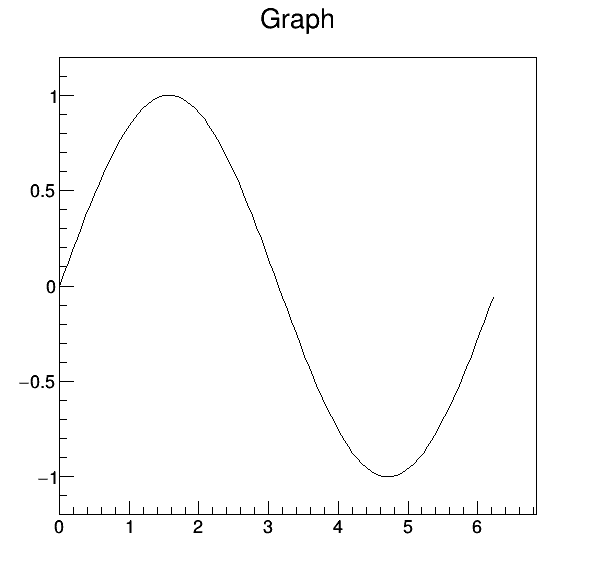

In [4]:
auto gr = new TGraph(100,q,sq);
gr->Draw();
can->Draw();